# Laboratorio 7 - Linear Programming
## <font size=4> *CC2017 - Modelación y Simulación*, 2024 </font>
## <font size=3 color='gray'> Samuel Chamale, Adrian Rodriguez y Daniel Gómez</font>

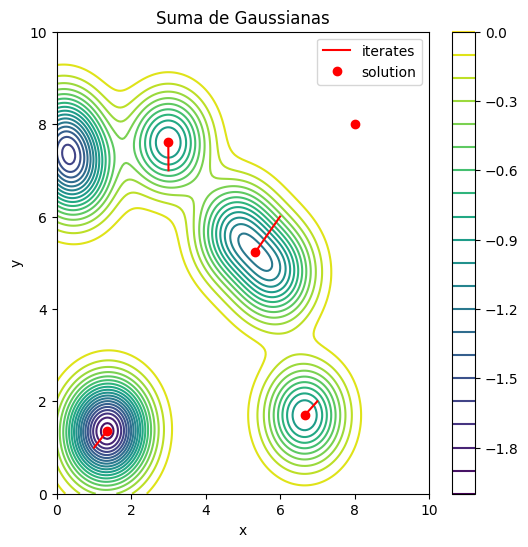

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parámetros iniciales
k = 8
sigma = 0.5

# Generamos k puntos aleatorios en el rectángulo [0, 8] x [0, 8]
np.random.seed(42)  # Semilla para reproducibilidad
points = np.random.uniform(0, 8, (k, 2))

# Definir la función de suma de gaussianas
def gaussian_sum(x, points, sigma):
    total = 0
    for p in points:
        total += np.exp(-np.linalg.norm(x - p)**2 / (2 * sigma))
    return -total  # Negativa para buscar mínimos

# Definir una cuadrícula para visualizar la función
xgrid = np.linspace(0, 10, 200)
ygrid = np.linspace(0, 10, 200)
X, Y = np.meshgrid(xgrid, ygrid)

Z = np.array([gaussian_sum(np.array([x, y]), points, sigma) for x, y in zip(X.flatten(), Y.flatten())])
Z = Z.reshape(X.shape)

# Graficamos la función en el espacio 2D
plt.figure(figsize=(6, 6))
contour = plt.contour(X, Y, Z, levels=20)
plt.colorbar(contour)
plt.title("Suma de Gaussianas")

# Definir múltiples inicializaciones para encontrar diferentes mínimos
initial_points = [np.array([1, 1]), np.array([6, 6]), np.array([3, 7]), np.array([7, 2]), np.array([8, 8])]
solutions = []

# Aplicar el método de minimización (descenso por gradiente)
for initial in initial_points:
    res = minimize(gaussian_sum, initial, args=(points, sigma), method='BFGS')
    solutions.append(res.x)

# Graficar las soluciones y las iteraciones
for initial, sol in zip(initial_points, solutions):
    plt.plot([initial[0], sol[0]], [initial[1], sol[1]], 'r-', label='iterates')
    plt.plot(sol[0], sol[1], 'ro', label='solution')

plt.legend(['iterates', 'solution'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
